- Need to optimize small-r behavior regulation. Extrapolate was working weird for some reason, so currently the small-r region is filled with the end point value
- Bump in $\xi_\eta$?
- Significant disagreement between Zeus built-in $\xi_\eta$ and and our own

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import zeus21

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [3]:
UserParams = zeus21.User_Parameters(precisionboost=2)
CosmoParams_input = zeus21.Cosmo_Parameters_Input(kmax_CLASS=1000., USE_RELATIVE_VELOCITIES=True,)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo) 
CorrFClass = zeus21.Correlations(UserParams, CosmoParams, ClassyCosmo)

In [4]:
r_list = CorrFClass.rlist_CF
xi_eta = CorrFClass.xiEta_RR_CF # This was in Zeus
xi_eta_para = CorrFClass.xiEta_RR_CF_para # These two are new
xi_eta_perp = CorrFClass.xiEta_RR_CF_perp # These two are new

In [10]:
xi_eta_avg = (xi_eta_para + 2 * xi_eta_perp) / 3

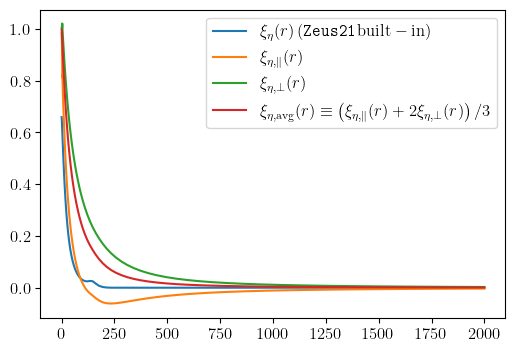

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(r_list, xi_eta[0, 0, :], label=r'$\xi_{\eta}(r)\,(\texttt{Zeus21}\,\mathrm{built-in})$')
ax.plot(r_list, xi_eta_para[0, 0, :], label=r'$\xi_{\eta,\parallel}(r)$')
ax.plot(r_list, xi_eta_perp[0, 0, :], label=r'$\xi_{\eta,\perp}(r)$')
ax.plot(r_list, xi_eta_avg[0, 0, :], label=r'$\xi_{\eta,\mathrm{avg}}(r)\equiv\left(\xi_{\eta,\parallel}(r)+2\xi_{\eta,\perp}(r)\right)/3$')
ax.legend()

In [8]:
para_0 = xi_eta_para[0, 0, 0]
perp_0 = xi_eta_perp[0, 0, 0]
para_0_err = np.abs(1 - para_0) * 100
perp_0_err = np.abs(1 - perp_0) * 100
print('Error at r=0: xi_eta_para: {:.2f}%, xi_eta_perp: {:.2f}%'.format(para_0_err, perp_0_err))

Error at r=0: xi_eta_para: 1.65%, xi_eta_perp: 0.46%


### Old functions (unnormalized)

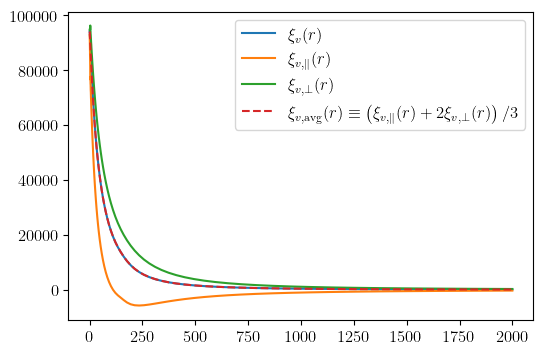

In [15]:
xi_v = CorrFClass.xi_RR_CF_v_old
xi_para = CorrFClass.xi_RR_CF_para_old
xi_perp = CorrFClass.xi_RR_CF_perp_old
xi_avg = (xi_para + 2 * xi_perp) / 3

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(r_list, xi_v[0, 0, :]/3, label=r'$\xi_{v}(r)$')
ax.plot(r_list, xi_para[0, 0, :], label=r'$\xi_{v,\parallel}(r)$')
ax.plot(r_list, xi_perp[0, 0, :], label=r'$\xi_{v,\perp}(r)$')
ax.plot(r_list, xi_avg[0, 0, :], label=r'$\xi_{v,\mathrm{avg}}(r)\equiv\left(\xi_{v,\parallel}(r)+2\xi_{v,\perp}(r)\right)/3$',
        linestyle='--')
ax.legend()
# ax.set_xbound(0, 5)